In [1]:
from horton import *
import numpy as np
import matplotlib.pyplot as plt 
import sys
sys.path.append('/home/giorgiod/Documents/horton_test/Alchemy CO-N2/Nitrogen')

In [3]:
from optimiz import optimiz
from nn_scf import uhf
Mu_NN=periodic['n'].mass/2.
def to_cm(k,Mu=Mu_NN):
    return (k/Mu)**0.5*centimeter/planck/lightspeed

def taylor4(dx,f,d1,d2,d3,d4):
    return f+dx*d1+0.5*d2*dx**2+d3*dx**3/6.+d4*dx**4/24.

In [31]:
%store -r

In [4]:
def FivePointDerivatives(x,h):
   # '''a prediction of the minimum of a function based on a 4 point approx'''
    points =[]
    for i in range (5):
        points.append(uhf(x+h*(i-2)))
    fd4=(points[4]-points[3]*4+points[2]*6-points[1]*4+points[0])/h**4
    fd3=(points[4]-2*points[3]+2*points[1]-points[0])/(2*h**3)
    fd1=(points[3]-points[1]-h**3*fd3/3.)/2/h
    fd2=(points[3]-2*points[2]+points[1]-h**4/12.*fd4)/(h**2)
    
    print 'the derivatives are:', fd1,fd2,fd3, fd4, 'to cm:' ,to_cm(fd2)
    return (x,points[2],fd1,fd2,fd3,fd4)

To obtain the point of minium we have to predict were the derivative is minimum, in particular we have to solve:
$ \frac{1}{6}f^{(4)}dx^3 +\frac{1}{2}f^{(3)}dx^2+ f'' dx+f'=0 $
which has the solution: $dx=-(b+C+\frac {\Delta _0}{C})\frac {1}{3a}$  where:
$\Delta _{0}=b^{2}-3ac$ , $\Delta _{1}=2b^{3}-9abc+27a^{2}d$ , 
$C={\sqrt[{3}]{\frac {\Delta _{1}\pm {\sqrt {{\Delta _{1}}^{2}-4{\Delta _{0}}^{3}}}}{2}}}$

In [5]:
def dx2f1(x,e,d1,d2,d3,d4):
    dx=-d1/d2
    p2d=d2+dx*d3
    return (x+dx,to_cm(p2d))

def dx2f2(x,e,d1,d2,d3,d4):
    dx=-d1/d2
    p2d=d2+dx*d3+dx**2*d4/2.
    return (x+dx,to_cm(p2d))

def dx3f1(x,e,d1,d2,d3,d4):
    delta=d2**2-2.*d1*d3
    if delta>0:
        dx=(-d2+(delta)**0.5)/d3
        p2d=d2+dx*d3
        return (x+dx,to_cm(p2d))
    else: return(1.,0.)
    
def dx3f2(x,e,d1,d2,d3,d4):
    delta=d2**2-2.*d1*d3
    if delta>0:
        dx=(-d2+(delta)**0.5)/d3
        p2d=d2+dx*d3+dx**2*d4/2.
        return (x+dx,to_cm(p2d))
    else: return(1.,0.)
    

def dx4f2(x,e,d1,d2,d3,d4):
    a=d4/6.
    b=d3/2.
    c=d2
    d=d1
    D0=b**2-3*a*c
    D1=2*b**3-9*a*b*c+27*a**2*d
    C=((D1+(D1**2-4*D0**3)**0.5)/2.)**(1/3.)
    dx=-(b+C+D0/C)/(3.*a)
    p2d=d2+dx*d3+0.5*d4*dx**2
    return x+dx, to_cm(p2d), e+d1*dx+d2*dx**2/2

def dx4f2C(x,e,d1,d2,d3,d4):
    a=d4/6.
    b=d3/2.
    c=d2
    d=d1
    D0=b**2-3*a*c
#    print 'D0=',D0
    D1=2*b**3-9*a*b*c+27*a**2*d
#    print 'D1= ', D1
#    print 'Delta=',(D1**2-4*D0**3)/(27*a**2)
    C=((D1+(D1**2-4*D0**3)**0.5)/2.)**(1/3.)
#    print 'C =', C
    dx=-(b+C+D0/C)/(3.*a)
    p2d=d2+dx*d3+0.5*d4*dx**2+d4**2/d3*dx**3/6.
#    print x+dx, to_cm(p2d)
    return x+dx, to_cm(p2d)

In [6]:
DerivativesH05=[]
for x in np.linspace(1.5,2.8,66):
    DerivativesH05.append(FivePointDerivatives(x,.05))

 _ __ _
/ (..) \ Welcome to HORTON 2.1.1!
\/ || \/
 |_''_|  HORTON is written and maintained by by Toon Verstraelen (1).

         This version contains contributions from Toon Verstraelen (1), Pawel Tecmer (2),
         Farnaz Heidar-Zadeh (2), Cristina E. González-Espinoza (2), Matthew Chan (2),
         Taewon D. Kim (2), Katharina Boguslawski (2), Stijn Fias (3),
         Steven Vandenbrande (1), Diego Berrocal (2), and Paul W. Ayers (2)

         (1) Center for Molecular Modeling (CMM), Ghent University, Ghent, Belgium.
         (2) The Ayers Group, McMaster University, Hamilton, Ontario, Canada.
         (3) General Chemistry (ALGC), Free University of Brussels, Brussels, Belgium.

         More information about HORTON can be found on this website:
         http://theochem.github.com/horton/

         The purpose of this log file is to track the progress and quality of a
         computation. Useful numerical output may be written to a checkpoint
         file and is accessible 

/home/giorgiod/.local/lib/python2.7/site-packages/horton/quadprog.py:621: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  lagrange = np.linalg.lstsq(r_free.T, -g_free)[0]


   1  2.06601e+00                          3     -107.9343452608209
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  6.29910e-01                          4     -108.1098332293066
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.09930e-01                          5     -108.1257390291022
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  6.28573e-02                          6     -108.1273097952912
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  2.11165e-02                          6     -108.1274663678488
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  6.27706e-03                          6     -108.1274820769586
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  2.12899e-03                          6     -108.1274836564495
   7               0.000e+00    1.0000

  10  2.02908e-06                          6     -108.4669931809979
  10               1.146e+13    1.1269745  6 M                                  
  11  3.71134e-09                          6     -108.4669931809981
  11               6.037e+13    1.0653916  6 C                                  
  12  2.99663e-10                          6     -108.4669931809978
  12               6.459e+14    1.1464891  6 C                                  
  13  1.80255e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.625983718446
                                           hartree       83.454356526758
                                              x_hf      -13.734667667200

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.28947e+01                          1      -91.9838110567291
   0  9.98029e+00                          2      -95.3637142985365
   0               1.000e+00    0.5897212  2 E                        -3.1705714
   1  2.05495e+00                          3     -108.0143429618130
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  6.20778e-01                          4     -108.1890104643644
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.05591e-01                          5     -108.2046268138543
   3               0.000e+00    1.0000000  5 E  

   5  2.26321e-02                          6     -108.5201651598889
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  6.69781e-03                          6     -108.5201843916487
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  2.09957e-03                          6     -108.5201861682747
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  6.14995e-04                          6     -108.5201863326236
   8               2.490e+11    1.3353355  6 M                                  
   9  1.15614e-04                          6     -108.5201863488507
   9               1.517e+12    1.5212598  6 M                                  
  10  1.78226e-06                          6     -108.5201863493986
  10               1.025e+13    1.1277993  6 M                                  
  11  3.27002e-09                          6     -108.5201863493986
  11               5.088e+13    1.0688

the derivatives are: -2.5524998134980117 10.474547541260408 -34.666639366946576 113.50882999977328 to cm: 6286.610854679356
Initialized: <horton.gbasis.cext.GOBasis object at 0x7f87b34c9ef0>
  Number of basis functions         : 60
  Number of normalization constants : 110
  Maximum shell type                : 3
  Center     0 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1
  Center     1 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.28243e+01                          1      -92.2112053695034
   0  9.89435e+00                          2      -95.6298950071648
   0               1.000e+00    0.5922324  2 E                        -3.08156

   3  2.40625e-01                          5     -108.5667320074604
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  7.16511e-02                          6     -108.5689653710591
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  2.20616e-02                          6     -108.5691678621000
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  6.47970e-03                          6     -108.5691863067325
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  2.02100e-03                          6     -108.5691879892215
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  5.87017e-04                          6     -108.5691881429404
   8               2.396e+11    1.3496591  6 M                                  
   9  1.07165e-04                          6     -108.5691881579464
   9               1.359e+12    1.5103

  11  2.59397e-09                          6     -108.7600914416507
  11               2.085e+13    1.0892485  6 C                                  
  12  3.94593e-10                          6     -108.7600914416514
  12               2.097e+14    1.1222351  6 C                                  
  13  2.43886e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      111.255761612568
                                           hartree       80.922658499114
                                              x_hf      -13.548188323281
                                                ne     -317.268372010540
                                                nn       29.878048780488
  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.23514e+01                          1      -93.3784456721439
   0  9.74070e+00                          2      -99.1518461726043
   0               1.000e+00    0.6955162  2 E                        -1.3688224
   1  2.44494e+00                          3     -108.3179525952604
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.81844e-01                          4     -108.5874711802455
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.37735e-01                          5     -108.6118474937181
   3               0.000e+00    1.0000000  5 E  

   5  1.92218e-02                          6     -108.7889740027517
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  5.42263e-03                          6     -108.7889889407263
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.64031e-03                          6     -108.7889902111016
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.55629e-04                          6     -108.7889903195433
   8               1.977e+11    1.4233548  6 M                                  
   9  7.12654e-05                          6     -108.7889903294901
   9               7.686e+11    1.4632470  6 M                                  
  10  8.05335e-07                          6     -108.7889903297154
  10               4.936e+12    1.1378936  6 M                                  
  11  2.63608e-09                          6     -108.7889903297156
  11               1.839e+13    1.0925

Initialized: <horton.gbasis.cext.GOBasis object at 0x7f87b34c9ef0>
  Number of basis functions         : 60
  Number of normalization constants : 110
  Maximum shell type                : 3
  Center     0 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1
  Center     1 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.22654e+01                          1      -93.5440592414024
   0  9.64708e+00                          2      -99.3742385240853
   0               1.000e+00    0.7011091  2 E                        -1.2949285
   1  2.44514e+00                          3     -108.3571028359370
   1               0.000e+00    1.0000000  3 E       

   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  6.37294e-02                          6     -108.8150564999383
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.88293e-02                          6     -108.8152294798043
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  5.28078e-03                          6     -108.8152439893262
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.58915e-03                          6     -108.8152452100945
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.38590e-04                          6     -108.8152453132408
   8               1.926e+11    1.4343508  6 M                                  
   9  6.70618e-05                          6     -108.8152453226140
   9               7.151e+11    1.4574026  6 M                                  
  10  7.29631e-07        

  12  3.35258e-10                          6     -108.5922013207140
  12               4.164e+14    1.1361902  6 C                                  
  13  2.02077e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.094178424647
                                           hartree       82.514149463628
                                              x_hf      -13.665132819452
                                                ne     -321.148299615343
                                                nn       31.612903225806
                                             total     -108.592201320714
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.17210e+01                          1      -94.3951275249357
   0  9.06982e+00                          2     -100.5526753028400
   0               1.000e+00    0.7366614  2 E                        -0.9021518
   1  2.45752e+00                          3     -108.5218156013995
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.57434e-01                          4     -108.8120832398575
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.21468e-01                          5     -108.8367763576591
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4 

   5  2.12637e-02                          6     -108.6353917174631
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  6.17768e-03                          6     -108.6354091069359
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.91224e-03                          6     -108.6354106641737
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  5.48736e-04                          6     -108.6354108039042
   8               2.269e+11    1.3697983  6 M                                  
   9  9.60650e-05                          6     -108.6354108173215
   9               1.159e+12    1.4960809  6 M                                  
  10  1.31307e-06                          6     -108.6354108177084
  10               7.774e+12    1.1308992  6 M                                  
  11  2.69384e-09                          6     -108.6354108177085
  11               3.410e+13    1.0775

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.16271e+01                          1      -94.5157732219236
   0  8.97195e+00                          2     -100.7249130927478
   0               1.000e+00    0.7428669  2 E                        -0.8451798
   1  2.46100e+00                          3     -108.5393940169281
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.55103e-01                          4     -108.8334256453177
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.19618e-01                          5     -108.8582522369764
   3               0.000e+00    1.0000000  5 E  

   4  6.84488e-02                          6     -108.6748561664021
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  2.07670e-02                          6     -108.6750459266194
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  5.99156e-03                          6     -108.6750626864668
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.84523e-03                          6     -108.6750641694865
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  5.25427e-04                          6     -108.6750643010175
   8               2.193e+11    1.3824674  6 M                                  
   9  8.95656e-05                          6     -108.6750643135128
   9               1.047e+12    1.4876530  6 M                                  
  10  1.17023e-06                          6     -108.6750643138531
  10               6.984e+12    1.1323

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.15328e+01                          1      -94.6310084587940
   0  8.87388e+00                          2     -100.8907620229941
   0               1.000e+00    0.7491382  2 E                        -0.7905980
   1  2.46479e+00                          3     -108.5545989817905
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.53013e-01                          4     -108.8525774112967
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.17870e-01                          5     -108.8775574083169
   3               0.000e+00    1.0000000  5 E  

   5  2.02962e-02                          6     -108.7113704963155
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  5.81656e-03                          6     -108.7113866788903
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.78222e-03                          6     -108.7113880942020
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  5.03717e-04                          6     -108.7113882183140
   8               2.124e+11    1.3946329  6 M                                  
   9  8.36872e-05                          6     -108.7113882299829
   9               9.512e+11    1.4799541  6 M                                  
  10  1.04692e-06                          6     -108.7113882302837
  10               6.294e+12    1.1339543  6 M                                  
  11  2.57526e-09                          6     -108.7113882302839
  11               2.549e+13    1.0842

  13  2.74958e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      110.697513921936
                                           hartree       79.769558128956
                                              x_hf      -13.464109032461
                                                ne     -314.507970883086
                                                nn       28.654970760234
                                             total     -108.850037104421
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0x7f87b34c9ef0>
  Number of basis functions         : 60
  Number of norma

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.20436e+01                          1      -93.9268854996149
   0  9.40929e+00                          2      -99.8967445816147
   0               1.000e+00    0.7155364  2 E                        -1.1206423
   1  2.44822e+00                          3     -108.4392820979211
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.67687e-01                          4     -108.7178895048135
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.28816e-01                          5     -108.7422807043375
   3               0.000e+00    1.0000000  5 E  

   6  4.96075e-03                          6     -108.8703971785903
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.47356e-03                          6     -108.8703982926773
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.00723e-04                          6     -108.8703983845564
   8               1.819e+11    1.4611365  6 M                                  
   9  5.80897e-05                          6     -108.8703983927250
   9               6.209e+11    1.4445954  6 M                                  
  10  5.78745e-07                          6     -108.8703983928840
  10               3.694e+12    1.1427735  6 M                                  
  11  2.86470e-09                          6     -108.8703983928845
  11               1.263e+13    1.1042184  6 C                                  
  12  4.38397e-10                          6     -108.8703983928844
  12               1.288e+14    1.1192

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.19527e+01                          1      -94.0683300571733
   0  9.31294e+00                          2     -100.0928656454523
   0               1.000e+00    0.7214699  2 E                        -1.0551717
   1  2.45035e+00                          3     -108.4664502186105
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.64401e-01                          4     -108.7481403739917
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.26570e-01                          5     -108.7725905410885
   3               0.000e+00    1.0000000  5 E  

   6  4.84542e-03                          6     -108.8886609571842
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.43181e-03                          6     -108.8886620346906
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.87277e-04                          6     -108.8886621227426
   8               1.783e+11    1.4716970  6 M                                  
   9  5.50272e-05                          6     -108.8886621305084
   9               5.971e+11    1.4401730  6 M                                  
  10  5.30683e-07                          6     -108.8886621306535
  10               3.439e+12    1.1439273  6 M                                  
  11  2.93655e-09                          6     -108.8886621306538
  11               1.158e+13    1.1075309  6 C                                  
  12  4.44027e-10                          6     -108.8886621306536
  12               1.204e+14    1.1201

  13  2.34699e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      111.429727847081
                                           hartree       81.265459646679
                                              x_hf      -13.573292116785
                                                ne     -318.097177370033
                                                nn       30.246913580247
                                             total     -108.728368412811
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0x7f87b34c9ef0>
  Number of basis functions         : 60
  Number of norma

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.13910e+01                          1      -94.7941821171118
   0  8.72663e+00                          2     -101.1279702221602
   0               1.000e+00    0.7586573  2 E                        -0.7131436
   1  2.47095e+00                          3     -108.5732683315992
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.50306e-01                          4     -108.8775005416529
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.15432e-01                          5     -108.9027472487182
   3               0.000e+00    1.0000000  5 E  

   4  6.56791e-02                          6     -108.7598949921655
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.96349e-02                          6     -108.7600745876974
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  5.57316e-03                          6     -108.7600899920278
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.69455e-03                          6     -108.7600913165539
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.73873e-04                          6     -108.7600914308161
   8               2.032e+11    1.4121106  6 M                                  
   9  7.58812e-05                          6     -108.7600914413984
   9               8.327e+11    1.4695435  6 M                                  
  10  8.92030e-07                          6     -108.7600914416510
  10               5.422e+12    1.1363

  12  4.41442e-10                          6     -108.8797838319199
  12               1.243e+14    1.1196396  6 C                                  
  13  2.86518e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      110.480706112769
                                           hartree       79.296819116741
                                              x_hf      -13.429805074973
                                                ne     -313.388423526687
                                                nn       28.160919540230
                                             total     -108.879783831920
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.19068e+01                          1      -94.1366892702757
   0  9.26454e+00                          2     -100.1882636151078
   0               1.000e+00    0.7244687  2 E                        -1.0233508
   1  2.45159e+00                          3     -108.4789126865693
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.62869e-01                          4     -108.7622204148625
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.25492e-01                          5     -108.7867084651342
   3               0.000e+00    1.0000000  5 E  

   5  1.74459e-02                          6     -108.8970355792683
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  4.79029e-03                          6     -108.8970486999251
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.41182e-03                          6     -108.8970497603128
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.80887e-04                          6     -108.8970498465800
   8               1.766e+11    1.4769630  6 M                                  
   9  5.35944e-05                          6     -108.8970498541581
   9               5.881e+11    1.4381129  6 M                                  
  10  5.08817e-07                          6     -108.8970498542972
  10               3.325e+12    1.1444598  6 M                                  
  11  2.97200e-09                          6     -108.8970498542973
  11               1.114e+13    1.1091

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.18143e+01                          1      -94.2688456260070
   0  9.16738e+00                          2     -100.3738567437188
   0               1.000e+00    0.7305269  2 E                        -0.9615368
   1  2.45437e+00                          3     -108.5017099598569
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.60018e-01                          4     -108.7884011877957
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.23425e-01                          5     -108.8129812514846
   3               0.000e+00    1.0000000  5 E  

   6  4.68488e-03                          6     -108.9124161138957
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.37354e-03                          6     -108.9124171422434
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.68739e-04                          6     -108.9124172251794
   8               1.735e+11    1.4874800  6 M                                  
   9  5.09109e-05                          6     -108.9124172324095
   9               5.754e+11    1.4342972  6 M                                  
  10  4.68944e-07                          6     -108.9124172325373
  10               3.117e+12    1.1454420  6 M                                  
  11  3.04121e-09                          6     -108.9124172325378
  11               1.040e+13    1.1123285  6 C                                  
  12  4.48258e-10                          6     -108.9124172325375
  12               1.128e+14    1.1227

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.17210e+01                          1      -94.3951275249356
   0  9.06982e+00                          2     -100.5526753028390
   0               1.000e+00    0.7366614  2 E                        -0.9021518
   1  2.45752e+00                          3     -108.5218156013996
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.57434e-01                          4     -108.8120832398576
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.21468e-01                          5     -108.8367763576594
   3               0.000e+00    1.0000000  5 E  

   6  4.58571e-03                          6     -108.9260072196547
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.33743e-03                          6     -108.9260082187285
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.57390e-04                          6     -108.9260082986296
   8               1.706e+11    1.4979815  6 M                                  
   9  4.84519e-05                          6     -108.9260083055451
   9               5.701e+11    1.4308871  6 M                                  
  10  4.33671e-07                          6     -108.9260083056629
  10               2.931e+12    1.1463303  6 M                                  
  11  3.10808e-09                          6     -108.9260083056635
  11               9.826e+12    1.1152869  6 C                                  
  12  4.47776e-10                          6     -108.9260083056632
  12               1.111e+14    1.1253

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.16271e+01                          1      -94.5157732219238
   0  8.97195e+00                          2     -100.7249130927486
   0               1.000e+00    0.7428669  2 E                        -0.8451798
   1  2.46100e+00                          3     -108.5393940169277
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.55103e-01                          4     -108.8334256453176
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.19618e-01                          5     -108.8582522369765
   3               0.000e+00    1.0000000  5 E  

   6  4.49249e-03                          6     -108.9379367579001
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.30337e-03                          6     -108.9379377302895
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.46795e-04                          6     -108.9379378074309
   8               1.679e+11    1.5084504  6 M                                  
   9  4.61981e-05                          6     -108.9379378140604
   9               5.723e+11    1.4278726  6 M                                  
  10  4.02437e-07                          6     -108.9379378141707
  10               2.759e+12    1.1471567  6 M                                  
  11  3.17365e-09                          6     -108.9379378141705
  11               9.402e+12    1.1178973  6 C                                  
  12  4.44344e-10                          6     -108.9379378141708
  12               1.122e+14    1.1285

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.15328e+01                          1      -94.6310084587938
   0  8.87388e+00                          2     -100.8907620229959
   0               1.000e+00    0.7491382  2 E                        -0.7905980
   1  2.46479e+00                          3     -108.5545989817905
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.53013e-01                          4     -108.8525774112966
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.17870e-01                          5     -108.8775574083168
   3               0.000e+00    1.0000000  5 E  

   5  1.63236e-02                          6     -108.9483001988705
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  4.40502e-03                          6     -108.9483123586396
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.27129e-03                          6     -108.9483133067842
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.36913e-04                          6     -108.9483133814187
   8               1.653e+11    1.5188353  6 M                                  
   9  4.41322e-05                          6     -108.9483133877913
   9               5.826e+11    1.4252273  6 M                                  
  10  3.74776e-07                          6     -108.9483133878940
  10               2.591e+12    1.1479618  6 M                                  
  11  3.24096e-09                          6     -108.9483133878934
  11               9.100e+12    1.1199

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.14383e+01                          1      -94.7410473568761
   0  8.77572e+00                          2     -101.0504116488769
   0               1.000e+00    0.7554702  2 E                        -0.7383781
   1  2.46884e+00                          3     -108.5675743468561
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.51153e-01                          4     -108.8696781285791
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.16221e-01                          5     -108.8948310964321
   3               0.000e+00    1.0000000  5 E  

   6  4.32308e-03                          6     -108.9572349975653
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.24109e-03                          6     -108.9572359237742
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.27708e-04                          6     -108.9572359961402
   8               1.626e+11    1.5290375  6 M                                  
   9  4.22393e-05                          6     -108.9572360022804
   9               6.014e+11    1.4229026  6 M                                  
  10  3.50301e-07                          6     -108.9572360023761
  10               2.415e+12    1.1487830  6 M                                  
  11  3.31556e-09                          6     -108.9572360023764
  11               8.878e+12    1.1212686  6 C                                  
  12  4.28785e-10                          6     -108.9572360023767
  12               1.184e+14    1.1359

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.13437e+01                          1      -94.8460932353414
   0  8.67755e+00                          2     -101.2040488012566
   0               1.000e+00    0.7618577  2 E                        -0.6884865
   1  2.47312e+00                          3     -108.5784546948387
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.49514e-01                          4     -108.8848585791802
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.14667e-01                          5     -108.9102038303077
   3               0.000e+00    1.0000000  5 E  

   6  4.24650e-03                          6     -108.9647994229782
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.21268e-03                          6     -108.9648003294535
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.19149e-04                          6     -108.9648003997735
   8               1.597e+11    1.5388958  6 M                                  
   9  4.05058e-05                          6     -108.9648004057053
   9               6.291e+11    1.4208213  6 M                                  
  10  3.28705e-07                          6     -108.9648004057961
  10               2.216e+12    1.1496307  6 M                                  
  11  3.40586e-09                          6     -108.9648004057961
  11               8.668e+12    1.1215190  6 C                                  
  12  4.18152e-10                          6     -108.9648004057959
  12               1.159e+14    1.1390

  14  1.17218e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      109.141549714235
                                           hartree       75.930616047784
                                              x_hf      -13.188381597476
                                                ne     -305.616436641876
                                                nn       24.747474747475
                                             total     -108.985177729859
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

the derivatives are: -0.3457466586506541 3.1720652117248465 -10.833496774012017 34.22364936795929 to cm: 3459.5530566858365
I

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.07835e+01                          1      -95.3817168188487
   0  8.09393e+00                          2     -102.0096694238450
   0               1.000e+00    0.8010594  2 E                        -0.4356566
   1  2.50228e+00                          3     -108.6062561170737
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.44023e-01                          4     -108.9419651033452
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.07219e-01                          5     -108.9688677515584
   3               0.000e+00    1.0000000  5 E  

   6  4.16215e-03                          6     -108.9862800288215
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.14128e-03                          6     -108.9862809614623
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  2.98171e-04                          6     -108.9862810303248
   8               5.978e+10    1.4436957  6 M                                  
   9  3.92172e-05                          6     -108.9862810358220
   9               1.685e+11    1.4160150  6 M                                  
  10  3.67026e-07                          6     -108.9862810359165
  10               2.015e+11    1.1823930  6 M                                  
  11  9.35464e-09                          6     -108.9862810359161
  11               1.053e+12    1.1077651  6 C                                  
  12  1.19755e-09                          6     -108.9862810359166
  12               4.996e+12    1.1105

  12  4.23553e-10                          6     -108.9611822908638
  12               1.183e+14    1.1376269  6 C                                  
  13  2.79687e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      109.676510292774
                                           hartree       77.386526495221
                                              x_hf      -13.292190599837
                                                ne     -308.935237035172
                                                nn       26.203208556150
                                             total     -108.961182290864
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.10446e+01                          1      -93.5463549128183
   0  7.87347e+00                          2     -101.6992451132892
   0               1.000e+00    0.8242288  2 E                        -0.3884416
   1  2.61312e+00                          3     -108.5455523315272
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.94637e-01                          4     -108.9512477728664
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.14115e-01                          5     -108.9839377798326
   3               0.000e+00    1.0000000  5 E  

   3  2.07722e-01                          5     -108.9658777238344
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.65478e-02                          6     -108.9679338457779
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.57390e-02                          6     -108.9680885689317
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  4.21017e-03                          6     -108.9681003104739
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.19914e-03                          6     -108.9681012078798
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.15103e-04                          6     -108.9681012772575
   8               1.581e+11    1.5436247  6 M                                  
   9  3.96952e-05                          6     -108.9681012830933
   9               6.460e+11    1.4198

  12  1.15073e-09                          6     -108.9858379638344
  12               5.610e+12    1.1107778  6 C                                  
  13  1.33467e-10                          6     -108.9858379638340
  13               3.508e+13    1.0202060  6 C                                  
  14  1.20660e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      109.098562418636
                                           hartree       75.804955891720
                                              x_hf      -13.179464173578
                                                ne     -305.333007678501
                                                nn       24.623115577889
  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.07380e+01                          1      -95.4196967912068
   0  8.04606e+00                          2     -102.0685125091850
   0               1.000e+00    0.8043732  2 E                        -0.4179888
   1  2.50490e+00                          3     -108.6060836617941
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.43890e-01                          4     -108.9444965849401
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.06738e-01                          5     -108.9715608500318
   3               0.000e+00    1.0000000  5 E  

   5  1.55468e-02                          6     -108.9865007878268
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  4.12203e-03                          6     -108.9865134528580
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.12799e-03                          6     -108.9865143763953
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  2.94546e-04                          6     -108.9865144445173
   8               5.713e+10    1.4462447  6 M                                  
   9  3.82441e-05                          6     -108.9865144499581
   9               1.537e+11    1.4082410  6 M                                  
  10  3.56158e-07                          6     -108.9865144500491
  10               1.870e+11    1.1836312  6 M                                  
  11  9.57356e-09                          6     -108.9865144500496
  11               9.679e+11    1.1089

  10  3.28705e-07                          6     -108.9648004057961
  10               2.216e+12    1.1496307  6 M                                  
  11  3.40586e-09                          6     -108.9648004057961
  11               8.668e+12    1.1215190  6 C                                  
  12  4.18152e-10                          6     -108.9648004057959
  12               1.159e+14    1.1390007  6 C                                  
  13  2.71160e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      109.622841722051
                                           hartree       77.248377827042
                                              x_hf      -13.282300984761

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.09975e+01                          1      -93.6113949820436
   0  7.83392e+00                          2     -101.7538952356418
   0               1.000e+00    0.8261379  2 E                        -0.3773431
   1  2.60657e+00                          3     -108.5451484533824
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.91980e-01                          4     -108.9510953687416
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.12984e-01                          5     -108.9837801240964
   3               0.000e+00    1.0000000  5 E  

   2  7.44023e-01                          4     -108.9419651033452
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.07219e-01                          5     -108.9688677515584
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.63170e-02                          6     -108.9709284421153
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.56321e-02                          6     -108.9710828816639
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  4.17513e-03                          6     -108.9710945551377
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.18602e-03                          6     -108.9710954439935
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.11209e-04                          6     -108.9710955124796
   8               1.564e+11    1.5481

  11  9.35464e-09                          6     -108.9862810359161
  11               1.053e+12    1.1077651  6 C                                  
  12  1.19755e-09                          6     -108.9862810359166
  12               4.996e+12    1.1105906  6 C                                  
  13  1.39536e-10                          6     -108.9862810359162
  13               3.239e+13    1.0208584  6 C                                  
  14  1.24309e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      109.056442285333
                                           hartree       75.680362476602
                                              x_hf      -13.170628969857

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.06928e+01                          1      -95.4567404107223
   0  7.99836e+00                          2     -102.1261762101172
   0               1.000e+00    0.8076912  2 E                        -0.4008133
   1  2.50753e+00                          3     -108.6055799262954
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.43808e-01                          4     -108.9467360129312
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.06277e-01                          5     -108.9739669626200
   3               0.000e+00    1.0000000  5 E  

   6  4.08416e-03                          6     -108.9865444922572
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.11534e-03                          6     -108.9865454076773
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  2.91161e-04                          6     -108.9865454751478
   8               5.470e+10    1.4486322  6 M                                  
   9  3.73345e-05                          6     -108.9865454805410
   9               1.407e+11    1.4005999  6 M                                  
  10  3.46408e-07                          6     -108.9865454806294
  10               1.740e+11    1.1847337  6 M                                  
  11  9.79007e-09                          6     -108.9865454806293
  11               8.931e+11    1.1103934  6 C                                  
  12  1.29119e-09                          6     -108.9865454806295
  12               3.993e+12    1.1102

  12  1.72618e-09                          6     -108.9771749222599
  12               1.580e+12    1.1095827  6 C                                  
  13  2.14445e-10                          6     -108.9771749222594
  13               1.132e+13    1.0160195  6 C                                  
  14  2.01666e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.613171939836
                                           hartree       74.264566336285
                                              x_hf      -13.070677861493
                                                ne     -301.897442884057
                                                nn       23.113207547170
  

Initialized: <horton.gbasis.cext.GOBasis object at 0x7f87b34c9ef0>
  Number of basis functions         : 60
  Number of normalization constants : 110
  Maximum shell type                : 3
  Center     0 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1
  Center     1 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.09507e+01                          1      -93.6752866498545
   0  7.79444e+00                          2     -101.8076785485664
   0               1.000e+00    0.8280599  2 E                        -0.3664285
   1  2.60028e+00                          3     -108.5444639106401
   1               0.000e+00    1.0000000  3 E       

   1  2.55117e+00                          3     -108.5239061160102
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.71747e-01                          4     -108.9375800165760
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.03492e-01                          5     -108.9708915614540
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.46559e-02                          6     -108.9733123170257
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.42278e-02                          6     -108.9734834675498
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.79275e-03                          6     -108.9734957034665
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.01075e-03                          6     -108.9734965933497
   7               0.000e+00    1.0000

   7  1.12799e-03                          6     -108.9865143763955
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  2.94546e-04                          6     -108.9865144445171
   8               5.713e+10    1.4462447  6 M                                  
   9  3.82441e-05                          6     -108.9865144499581
   9               1.537e+11    1.4082410  6 M                                  
  10  3.56158e-07                          6     -108.9865144500492
  10               1.870e+11    1.1836312  6 M                                  
  11  9.57355e-09                          6     -108.9865144500494
  11               9.679e+11    1.1089885  6 C                                  
  12  1.24442e-09                          6     -108.9865144500495
  12               4.460e+12    1.1104330  6 C                                  
  13  1.45690e-10                          6     -108.9865144500492
  13               2.981e+13    1.0213

  14  1.91961e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.646037094036
                                           hartree       74.377182620569
                                              x_hf      -13.078598779668
                                                ne     -302.146182939797
                                                nn       23.222748815166
                                             total     -108.978813189695
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0x7f87b34c9ef0>
  Number of basis functions         : 60
  Number of norma

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.09975e+01                          1      -93.6113949820435
   0  7.83392e+00                          2     -101.7538952356410
   0               1.000e+00    0.8261379  2 E                        -0.3773431
   1  2.60657e+00                          3     -108.5451484533825
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.91980e-01                          4     -108.9510953687413
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.12984e-01                          5     -108.9837801240961
   3               0.000e+00    1.0000000  5 E  

   3  2.04150e-01                          5     -108.9728018027562
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.48139e-02                          6     -108.9752170480736
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.42995e-02                          6     -108.9753879002498
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.80618e-03                          6     -108.9754001133059
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.01629e-03                          6     -108.9754010004145
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  2.69263e-04                          6     -108.9754010664190
   8               3.811e+10    1.4675116  6 M                                  
   9  3.08763e-05                          6     -108.9754010718561
   9               6.595e+10    1.3301

   9  3.92172e-05                          6     -108.9862810358219
   9               1.685e+11    1.4160150  6 M                                  
  10  3.67026e-07                          6     -108.9862810359164
  10               2.015e+11    1.1823930  6 M                                  
  11  9.35463e-09                          6     -108.9862810359163
  11               1.053e+12    1.1077652  6 C                                  
  12  1.19755e-09                          6     -108.9862810359164
  12               4.996e+12    1.1105906  6 C                                  
  13  1.39547e-10                          6     -108.9862810359161
  13               3.239e+13    1.0208601  6 C                                  
  14  1.24223e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.04566e+01                          1      -94.3052731343837
   0  7.36638e+00                          2     -102.3444684262852
   0               1.000e+00    0.8499413  2 E                        -0.2586485
   1  2.54750e+00                          3     -108.5206396447316
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.70641e-01                          4     -108.9354287180335
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.02870e-01                          5     -108.9688546228769
   3               0.000e+00    1.0000000  5 E  

   2  7.94637e-01                          4     -108.9512477728664
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.14115e-01                          5     -108.9839377798326
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.76510e-02                          6     -108.9863579790846
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.54132e-02                          6     -108.9865319189647
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  4.08416e-03                          6     -108.9865444922572
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.11534e-03                          6     -108.9865454076773
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  2.91161e-04                          6     -108.9865454751478
   8               5.470e+10    1.4486

   9  3.12252e-05                          6     -108.9771749221828
   9               6.951e+10    1.3352665  6 M                                  
  10  2.93956e-07                          6     -108.9771749222596
  10               9.787e+10    1.1829612  6 M                                  
  11  1.18829e-08                          6     -108.9771749222600
  11               4.885e+11    1.1362100  6 C                                  
  12  1.72618e-09                          6     -108.9771749222599
  12               1.580e+12    1.1095827  6 C                                  
  13  2.14445e-10                          6     -108.9771749222594
  13               1.132e+13    1.0160195  6 C                                  
  14  2.01666e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.09507e+01                          1      -93.6752866498541
   0  7.79444e+00                          2     -101.8076785485659
   0               1.000e+00    0.8280599  2 E                        -0.3664285
   1  2.60028e+00                          3     -108.5444639106397
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.89469e-01                          4     -108.9507422314043
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.11901e-01                          5     -108.9834327325444
   3               0.000e+00    1.0000000  5 E  

   4  5.46559e-02                          6     -108.9733123170261
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.42278e-02                          6     -108.9734834675499
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.79275e-03                          6     -108.9734957034666
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.01075e-03                          6     -108.9734965933497
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  2.68644e-04                          6     -108.9734966597368
   8               3.725e+10    1.4685826  6 M                                  
   9  3.05705e-05                          6     -108.9734966652314
   9               6.277e+10    1.3252603  6 M                                  
  10  2.90570e-07                          6     -108.9734966653085
  10               8.944e+10    1.1790

  10  2.97806e-07                          6     -108.9482752199249
  10               6.434e+10    1.1449796  6 M                                  
  11  1.46933e-08                          6     -108.9482752199253
  11               3.879e+11    1.2004571  6 C                                  
  12  2.02888e-09                          6     -108.9482752199250
  12               8.865e+11    1.1175418  6 C                                  
  13  2.65712e-10                          6     -108.9482752199251
  13               4.375e+12    0.9850831  6 C                                  
  14  3.75918e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.268765567

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.04139e+01                          1      -94.3562298551222
   0  7.32820e+00                          2     -102.3885191254539
   0               1.000e+00    0.8519870  2 E                        -0.2499670
   1  2.54403e+00                          3     -108.5171803106601
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.69642e-01                          4     -108.9331467240237
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.02285e-01                          5     -108.9666957338822
   3               0.000e+00    1.0000000  5 E  

   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.38313e-02                          6     -108.9419007343543
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.36926e-02                          6     -108.9420821436257
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.76851e-03                          6     -108.9420953300326
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  9.87016e-04                          6     -108.9420963232097
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  2.78896e-04                          6     -108.9420964015481
   8               3.181e+10    1.4685744  6 M                                  
   9  3.00607e-05                          6     -108.9420964086011
   9               4.326e+10    1.2864455  6 M                                  
  10  3.03670e-07        

   9  3.08763e-05                          6     -108.9754010718561
   9               6.595e+10    1.3301243  6 M                                  
  10  2.92033e-07                          6     -108.9754010719329
  10               9.348e+10    1.1811451  6 M                                  
  11  1.20988e-08                          6     -108.9754010719331
  11               4.690e+11    1.1401456  6 C                                  
  12  1.76388e-09                          6     -108.9754010719331
  12               1.469e+12    1.1096378  6 C                                  
  13  2.20325e-10                          6     -108.9754010719331
  13               1.039e+13    1.0145808  6 C                                  
  14  2.09770e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.93648e+00                          1      -94.8937495355929
   0  6.88279e+00                          2     -102.8614992867333
   0               1.000e+00    0.8770169  2 E                        -0.1598217
   1  2.51575e+00                          3     -108.4628392960203
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.64767e-01                          4     -108.8971883769960
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  1.97687e-01                          5     -108.9328227890522
   3               0.000e+00    1.0000000  5 E  

   3  2.02870e-01                          5     -108.9688546228765
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.45130e-02                          6     -108.9712818046615
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.41607e-02                          6     -108.9714533437773
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.78117e-03                          6     -108.9714656114236
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.00578e-03                          6     -108.9714665049643
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  2.68252e-04                          6     -108.9714665718214
   8               3.646e+10    1.4695215  6 M                                  
   9  3.03070e-05                          6     -108.9714665773837
   9               5.992e+10    1.3206

   9  2.98888e-05                          6     -108.9452262329490
   9               4.398e+10    1.2885485  6 M                                  
  10  3.00556e-07                          6     -108.9452262330439
  10               6.317e+10    1.1411758  6 M                                  
  11  1.49168e-08                          6     -108.9452262330438
  11               3.910e+11    1.2070711  6 C                                  
  12  2.03370e-09                          6     -108.9452262330444
  12               8.767e+11    1.1193961  6 C                                  
  13  2.66216e-10                          6     -108.9452262330441
  13               4.160e+12    0.9813344  6 C                                  
  14  3.44467e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0x7f87b34c9ef0>
  Number of basis functions         : 60
  Number of normalization constants : 110
  Maximum shell type                : 3
  Center     0 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1
  Center     1 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.03717e+01                          1      -94.4061890047150
   0  7.29015e+00                          2     -102.4318199560037
   0               1.000e+00    0.8540403  2 E                        -0.2414695
   1  2.54075e+00                          3     -108.5135345000953
   1               0.000e+00    1.0000000  3 E       

   1  2.51730e+00                          3     -108.4681458833499
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.64753e-01                          4     -108.9007001186899
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  1.97920e-01                          5     -108.9361225805100
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.38404e-02                          6     -108.9386919255268
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.36723e-02                          6     -108.9388747076220
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.77703e-03                          6     -108.9388880280728
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  9.88506e-04                          6     -108.9388890358624
   7               0.000e+00    1.0000

   6  3.79275e-03                          6     -108.9734957034666
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.01075e-03                          6     -108.9734965933497
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  2.68644e-04                          6     -108.9734966597368
   8               3.725e+10    1.4685826  6 M                                  
   9  3.05705e-05                          6     -108.9734966652314
   9               6.277e+10    1.3252603  6 M                                  
  10  2.90570e-07                          6     -108.9734966653085
  10               8.944e+10    1.1790110  6 M                                  
  11  1.23189e-08                          6     -108.9734966653085
  11               4.520e+11    1.1443528  6 C                                  
  12  1.80002e-09                          6     -108.9734966653084
  12               1.370e+12    1.1097

  12  2.02888e-09                          6     -108.9482752199250
  12               8.865e+11    1.1175418  6 C                                  
  13  2.65712e-10                          6     -108.9482752199251
  13               4.375e+12    0.9850831  6 C                                  
  14  3.75918e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.268765567047
                                           hartree       72.983273075292
                                              x_hf      -12.980904487561
                                                ne     -299.094409374702
                                                nn       21.875000000000
  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.04139e+01                          1      -94.3562298551218
   0  7.32820e+00                          2     -102.3885191254537
   0               1.000e+00    0.8519870  2 E                        -0.2499670
   1  2.54403e+00                          3     -108.5171803106603
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.69642e-01                          4     -108.9331467240232
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  2.02285e-01                          5     -108.9666957338822
   3               0.000e+00    1.0000000  5 E  

   4  5.38313e-02                          6     -108.9419007343542
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.36926e-02                          6     -108.9420821436261
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.76851e-03                          6     -108.9420953300328
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  9.87016e-04                          6     -108.9420963232099
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  2.78896e-04                          6     -108.9420964015487
   8               3.181e+10    1.4685744  6 M                                  
   9  3.00607e-05                          6     -108.9420964086008
   9               4.326e+10    1.2864455  6 M                                  
  10  3.03670e-07                          6     -108.9420964086993
  10               6.224e+10    1.1375

  10  3.55784e-07                          6     -108.9070465258746
  10               6.994e+10    1.1188154  6 M                                  
  11  1.55191e-08                          6     -108.9070465258747
  11               5.411e+11    1.2678722  6 C                                  
  12  1.86148e-09                          6     -108.9070465258748
  12               1.282e+12    1.1521886  6 C                                  
  13  2.35249e-10                          6     -108.9070465258749
  13               3.180e+12    0.9688370  6 C                                  
  14  4.17407e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.003843887

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.93648e+00                          1      -94.8937495355929
   0  6.88279e+00                          2     -102.8614992867333
   0               1.000e+00    0.8770169  2 E                        -0.1598217
   1  2.51575e+00                          3     -108.4628392960203
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.64767e-01                          4     -108.8971883769960
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  1.97687e-01                          5     -108.9328227890522
   3               0.000e+00    1.0000000  5 E  

   4  5.45242e-02                          6     -108.8991463996865
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.36469e-02                          6     -108.8993487705617
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.95911e-03                          6     -108.8993640883401
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.03751e-03                          6     -108.8993653207489
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.20086e-04                          6     -108.8993654270970
   8               3.505e+10    1.4407453  6 M                                  
   9  3.49499e-05                          6     -108.8993654378528
   9               4.411e+10    1.2653315  6 M                                  
  10  3.71154e-07                          6     -108.8993654380149
  10               7.683e+10    1.1196

   9  2.98888e-05                          6     -108.9452262329487
   9               4.398e+10    1.2885485  6 M                                  
  10  3.00556e-07                          6     -108.9452262330439
  10               6.317e+10    1.1411759  6 M                                  
  11  1.49168e-08                          6     -108.9452262330437
  11               3.910e+11    1.2070707  6 C                                  
  12  2.03371e-09                          6     -108.9452262330441
  12               8.767e+11    1.1193965  6 C                                  
  13  2.66225e-10                          6     -108.9452262330439
  13               4.160e+12    0.9813299  6 C                                  
  14  3.44155e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.52845e+00                          1      -95.3109645398523
   0  6.46652e+00                          2     -103.2437573158512
   0               1.000e+00    0.9024758  2 E                        -0.0937306
   1  2.50515e+00                          3     -108.3913540559592
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.68628e-01                          4     -108.8498809748878
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  1.96406e-01                          5     -108.8884521276502
   3               0.000e+00    1.0000000  5 E  

   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.38404e-02                          6     -108.9386919255266
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.36723e-02                          6     -108.9388747076219
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.77703e-03                          6     -108.9388880280731
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  9.88506e-04                          6     -108.9388890358624
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  2.81202e-04                          6     -108.9388891158692
   8               3.173e+10    1.4672710  6 M                                  
   9  3.02704e-05                          6     -108.9388891231364
   9               4.267e+10    1.2844774  6 M                                  
  10  3.07149e-07        

  10  3.63246e-07                          6     -108.9032292155026
  10               7.306e+10    1.1190713  6 M                                  
  11  1.53054e-08                          6     -108.9032292155029
  11               5.654e+11    1.2704804  6 C                                  
  12  1.83242e-09                          6     -108.9032292155028
  12               1.381e+12    1.1554836  6 C                                  
  13  2.35706e-10                          6     -108.9032292155025
  13               3.096e+12    0.9726042  6 C                                  
  14  7.32261e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      107.984836893

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.89976e+00                          1      -94.9327914233133
   0  6.84689e+00                          2     -102.8965833282265
   0               1.000e+00    0.8791309  2 E                        -0.1534374
   1  2.51433e+00                          3     -108.4574146885566
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.64843e-01                          4     -108.8935989298047
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  1.97476e-01                          5     -108.9294512461553
   3               0.000e+00    1.0000000  5 E  

   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.46288e-02                          6     -108.8952360808149
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.36602e-02                          6     -108.8954405940486
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.98260e-03                          6     -108.8954561382357
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.04471e-03                          6     -108.8954573969104
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.24740e-04                          6     -108.8954575064306
   8               3.575e+10    1.4377705  6 M                                  
   9  3.55778e-05                          6     -108.8954575176211
   9               4.504e+10    1.2633441  6 M                                  
  10  3.79520e-07        

   8  2.78896e-04                          6     -108.9420964015487
   8               3.181e+10    1.4685744  6 M                                  
   9  3.00607e-05                          6     -108.9420964086008
   9               4.326e+10    1.2864455  6 M                                  
  10  3.03670e-07                          6     -108.9420964086993
  10               6.224e+10    1.1375143  6 M                                  
  11  1.51263e-08                          6     -108.9420964086993
  11               3.958e+11    1.2137205  6 C                                  
  12  2.03467e-09                          6     -108.9420964086993
  12               8.732e+11    1.1214931  6 C                                  
  13  2.66689e-10                          6     -108.9420964086994
  13               3.894e+12    0.9772694  6 C                                  
  14  3.72819e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  14  4.17407e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.003843887564
                                           hartree       71.820949745010
                                              x_hf      -12.900008112284
                                                ne     -296.594543910572
                                                nn       20.762711864407
                                             total     -108.907046525875
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0x7f87b34c9ef0>
  Number of basis functions         : 60
  Number of norma

                                                nn       19.918699186992
                                             total     -108.867046611068
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

the derivatives are: 0.37933290275636483 0.488591712100117 -2.450348761385612 7.693783347804127 to cm: 1357.7568104156412
Initialized: <horton.gbasis.cext.GOBasis object at 0x7f87b34c9ef0>
  Number of basis functions         : 60
  Number of normalization constants : 110
  Maximum shell type                : 3
  Center     0 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1
  Center     1 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

   0  6.53360e+00                          2     -103.1856309584408
   0               1.000e+00    0.8982292  2 E                        -0.1032119
   1  2.50609e+00                          3     -108.4040966110558
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.67644e-01                          4     -108.8583199882025
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  1.96457e-01                          5     -108.8963605962917
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.45242e-02                          6     -108.8991463996865
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.36469e-02                          6     -108.8993487705617
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.95911e-03                          6     -108.8993640883401
   6               0.000e+00    1.0000

   6  4.23108e-03                          6     -108.8586473251166
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.12641e-03                          6     -108.8586488621310
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.73238e-04                          6     -108.8586490063749
   8               4.161e+10    1.4183840  6 M                                  
   9  4.25200e-05                          6     -108.8586490224942
   9               5.687e+10    1.2481997  6 M                                  
  10  4.77345e-07                          6     -108.8586490227598
  10               1.720e+11    1.1240067  6 M                                  
  11  9.87975e-09                          6     -108.8586490227600
  11               1.083e+12    1.2218356  6 C                                  
  12  1.32800e-09                          6     -108.8586490227598
  12               3.915e+12    1.1931

  12  1.90256e-09                          6     -108.9108149702255
  12               1.122e+12    1.1470713  6 C                                  
  13  4.25678e-10                          6     -108.9108149702258
  13               6.656e+11    0.8575515  6 C                                  
  14  3.34257e-10                          6     -108.9108149702256
  14               5.005e+10    0.5386579  6 C                                  
  15  3.51555e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.023291191909
                                           hartree       71.913609257100
                                              x_hf      -12.906438293604

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.24231e+00                          1      -95.5829626191490
   0  6.14606e+00                          2     -103.5049166590263
   0               1.000e+00    0.9235910  2 E                        -0.0545940
   1  2.50329e+00                          3     -108.3245220596410
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.74106e-01                          4     -108.8054669919259
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  1.96754e-01                          5     -108.8468220179530
   3               0.000e+00    1.0000000  5 E  

   2  7.67188e-01                          4     -108.8624686893901
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  1.96503e-01                          5     -108.9002490162593
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.44252e-02                          6     -108.9030125139295
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.36360e-02                          6     -108.9032127961715
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.93662e-03                          6     -108.9032278945829
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.03073e-03                          6     -108.9032291016944
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.15602e-04                          6     -108.9032292050047
   8               3.440e+10    1.4437

   8  3.67342e-04                          6     -108.8628609274874
   8               4.134e+10    1.4194623  6 M                                  
   9  4.16445e-05                          6     -108.8628609429646
   9               5.581e+10    1.2490521  6 M                                  
  10  4.64362e-07                          6     -108.8628609432168
  10               1.573e+11    1.1244633  6 M                                  
  11  1.04836e-08                          6     -108.8628609432171
  11               9.938e+11    1.2333612  6 C                                  
  12  1.40374e-09                          6     -108.8628609432173
  12               3.483e+12    1.1914147  6 C                                  
  13  2.04539e-10                          6     -108.8628609432173
  13               7.674e+12    1.0676542  6 C                                  
  14  9.38981e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  12  1.91688e-09                          6     -108.9145320729776
  12               1.116e+12    1.1453223  6 C                                  
  13  2.60946e-10                          6     -108.9145320729783
  13               2.407e+12    0.9527034  6 C                                  
  14  1.12419e-10                          6     -108.9145320729778
  14               8.972e+10    0.7272083  6 C                                  
  15  6.78803e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      108.043187194672
                                           hartree       72.007007046444
                                              x_hf      -12.912923024712

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.26880e+00                          1      -95.5584793347768
   0  6.17696e+00                          2     -103.4808684796255
   0               1.000e+00    0.9214929  2 E                        -0.0579234
   1  2.50333e+00                          3     -108.3313775890755
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.73566e-01                          4     -108.8100390830236
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  1.96686e-01                          5     -108.8511101652492
   3               0.000e+00    1.0000000  5 E  

   0  6.60163e+00                          2     -103.1253722600060
   0               1.000e+00    0.8939805  2 E                        -0.1132848
   1  2.50731e+00                          3     -108.4165559628207
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.66759e-01                          4     -108.8665667244101
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  1.96564e-01                          5     -108.9040904493027
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.43324e-02                          6     -108.9068320969023
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.36274e-02                          6     -108.9070303463440
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.91519e-03                          6     -108.9070452325817
   6               0.000e+00    1.0000

   6  4.17104e-03                          6     -108.8670449915018
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.10590e-03                          6     -108.8670464604030
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.61556e-04                          6     -108.8670465959693
   8               4.091e+10    1.4208684  6 M                                  
   9  4.07927e-05                          6     -108.8670466108279
   9               5.452e+10    1.2502227  6 M                                  
  10  4.51919e-07                          6     -108.8670466110679
  10               1.433e+11    1.1246805  6 M                                  
  11  1.11023e-08                          6     -108.8670466110681
  11               9.199e+11    1.2436881  6 C                                  
  12  1.47170e-09                          6     -108.8670466110681
  12               3.081e+12    1.1881

  10  5.99288e-07                          6     -108.8241995886571
  10               2.097e+11    1.1180168  6 M                                  
  11  7.95324e-09                          6     -108.8241995886572
  11               1.547e+12    1.1553729  6 C                                  
  12  3.37744e-09                          6     -108.8241995886572
  12               1.508e+11    0.6343941  6 C                                  
  13  2.16055e-09                          6     -108.8241995886573
  13               8.855e+11    0.7233667  6 C                                  
  14  1.16667e-10                          6     -108.8241995886571
  14               3.483e+11    1.0484933  6 C                                  
  15  2.49956e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

  14  3.13286e-10                          6     -108.8794284035359
  14               7.209e+10    0.5163908  6 C                                  
  15  3.57767e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      107.879587292793
                                           hartree       71.192394936012
                                              x_hf      -12.856476558404
                                                ne     -295.259543127435
                                                nn       20.164609053498
                                             total     -108.879428403536
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.04650e+00                          1      -95.7594405146331
   0  5.90838e+00                          2     -103.6825122765175
   0               1.000e+00    0.9402150  2 E                        -0.0321650
   1  2.50348e+00                          3     -108.2690020919567
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.77813e-01                          4     -108.7682478172761
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  1.97425e-01                          5     -108.8118664973988
   3               0.000e+00    1.0000000  5 E  

   2  7.71340e-01                          4     -108.8280712806979
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  1.96476e-01                          5     -108.8680146746785
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.53551e-02                          6     -108.8709672936078
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.37817e-02                          6     -108.8711856631764
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  4.14190e-03                          6     -108.8712027037730
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.09611e-03                          6     -108.8712041399061
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.55888e-04                          6     -108.8712042713382
   8               4.033e+10    1.4225

   7  1.20604e-03                          6     -108.8285650949459
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.16996e-04                          6     -108.8285652736708
   8               3.837e+10    1.4198342  6 M                                  
   9  4.92280e-05                          6     -108.8285652949715
   9               5.461e+10    1.2509591  6 M                                  
  10  5.82472e-07                          6     -108.8285652953455
  10               2.166e+11    1.1186078  6 M                                  
  11  7.69286e-09                          6     -108.8285652953460
  11               2.018e+12    1.1624702  6 C                                  
  12  8.74944e-10                          6     -108.8285652953461
  12               6.664e+12    1.1608394  6 C                                  
  13  2.38338e-10                          6     -108.8285652953462
  13               3.792e+12    0.9075

  11  1.34131e-08                          6     -108.8834910698677
  11               7.192e+11    1.2691537  6 C                                  
  12  1.67012e-09                          6     -108.8834910698676
  12               2.033e+12    1.1718956  6 C                                  
  13  3.18529e-10                          6     -108.8834910698677
  13               1.424e+12    0.9143856  6 C                                  
  14  2.80694e-10                          6     -108.8834910698677
  14               6.852e+10    0.5091957  6 C                                  
  15  4.03241e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      107.896121680

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.06946e+00                          1      -95.7391713319269
   0  5.93717e+00                          2     -103.6616793846034
   0               1.000e+00    0.9381546  2 E                        -0.0345796
   1  2.50344e+00                          3     -108.2759813396997
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.77429e-01                          4     -108.7729474785322
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  1.97334e-01                          5     -108.8162860250414
   3               0.000e+00    1.0000000  5 E  

   1  2.50393e+00                          3     -108.3651526866421
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.70781e-01                          4     -108.8325053157863
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  1.96442e-01                          5     -108.8721700740366
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.52243e-02                          6     -108.8750978952292
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.37570e-02                          6     -108.8753138478748
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  4.11342e-03                          6     -108.8753306236308
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.08664e-03                          6     -108.8753320278832
   7               0.000e+00    1.0000

   6  4.42153e-03                          6     -108.8329148229530
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.19405e-03                          6     -108.8329165831307
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.10531e-04                          6     -108.8329167565581
   8               3.927e+10    1.4187636  6 M                                  
   9  4.82154e-05                          6     -108.8329167770464
   9               5.588e+10    1.2498428  6 M                                  
  10  5.66055e-07                          6     -108.8329167774032
  10               2.207e+11    1.1192814  6 M                                  
  11  7.70933e-09                          6     -108.8329167774032
  11               1.899e+12    1.1647597  6 C                                  
  12  1.14590e-09                          6     -108.8329167774033
  12               1.755e+12    1.0914

  10  7.44808e-07                          6     -108.7889075897656
  10               1.476e+11    1.1156234  6 M                                  
  11  9.60029e-09                          6     -108.7889075897655
  11               1.566e+12    1.1669105  6 C                                  
  12  1.87879e-09                          6     -108.7889075897659
  12               6.490e+11    1.0261718  6 C                                  
  13  2.49484e-09                          6     -108.7889075897654
  13               4.688e+11    0.4497495  6 C                                  
  14  2.06192e-10                          6     -108.7889075897653
  14               2.831e+11    1.0322779  6 C                                  
  15  3.04145e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

  14  2.78711e-10                          6     -108.8458723171933
  14               1.541e+11    0.5466822  6 C                                  
  15  2.70417e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      107.760561592214
                                           hartree       70.514815122468
                                              x_hf      -12.809726286740
                                                ne     -293.833435095732
                                                nn       19.521912350598
                                             total     -108.845872317193
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  8.87719e+00                          1      -95.9049788496134
   0  5.68772e+00                          2     -103.8364959964649
   0               1.000e+00    0.9564806  2 E                        -0.0164540
   1  2.50371e+00                          3     -108.2132263098217
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.79749e-01                          4     -108.7304350385562
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  1.98145e-01                          5     -108.7762294271036
   3               0.000e+00    1.0000000  5 E  

   1  2.50329e+00                          3     -108.3038135107607
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.75646e-01                          4     -108.7916268270736
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  1.96985e-01                          5     -108.8338346344041
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.64776e-02                          6     -108.8369926240566
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.40291e-02                          6     -108.8372314510660
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  4.38901e-03                          6     -108.8372507926369
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.18224e-03                          6     -108.8372525138288
   7               0.000e+00    1.0000

   5  1.44095e-02                          6     -108.7933193273647
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  4.71723e-03                          6     -108.7933418337544
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.30606e-03                          6     -108.7933439688699
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.69932e-04                          6     -108.7933441937251
   8               3.043e+10    1.4341439  6 M                                  
   9  5.77639e-05                          6     -108.7933442223391
   9               4.271e+10    1.2604750  6 M                                  
  10  7.25812e-07                          6     -108.7933442228789
  10               1.535e+11    1.1157807  6 M                                  
  11  9.36218e-09                          6     -108.7933442228789
  11               1.650e+12    1.1671

   9  4.43386e-05                          6     -108.8501531063145
   9               5.803e+10    1.2475201  6 M                                  
  10  5.04910e-07                          6     -108.8501531066074
  10               1.999e+11    1.1225770  6 M                                  
  11  8.80085e-09                          6     -108.8501531066077
  11               1.322e+12    1.1975887  6 C                                  
  12  1.15827e-09                          6     -108.8501531066078
  12               4.818e+12    1.1888412  6 C                                  
  13  2.74260e-10                          6     -108.8501531066074
  13               2.596e+12    0.9105598  6 C                                  
  14  2.58253e-10                          6     -108.8501531066078
  14               1.401e+11    0.4966430  6 C                                  
  15  3.27091e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  14  1.53623e-10                          6     -108.8066196311316
  14               2.976e+11    1.0545376  6 C                                  
  15  2.85549e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      107.651673866985
                                           hartree       69.800539696927
                                              x_hf      -12.760659276459
                                                ne     -292.344327764738
                                                nn       18.846153846154
                                             total     -108.806619631131
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.19071e+00                          1      -95.6302514794320
   0  6.08506e+00                          2     -103.5517338362788
   0               1.000e+00    0.9277751  2 E                        -0.0482987
   1  2.50327e+00                          3     -108.3107369363623
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.75148e-01                          4     -108.7962591004691
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  1.96904e-01                          5     -108.8381827245734
   3               0.000e+00    1.0000000  5 E  

   1  2.50365e+00                          3     -108.2410731908810
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.79050e-01                          4     -108.7493724854209
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  1.97791e-01                          5     -108.7940957410061
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.77486e-02                          6     -108.7974882701206
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.43700e-02                          6     -108.7977512637171
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  4.68466e-03                          6     -108.7977734473913
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.29331e-03                          6     -108.7977755392101
   7               0.000e+00    1.0000

   6  4.99619e-03                          6     -108.7533390116007
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.41980e-03                          6     -108.7533415422532
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  5.28788e-04                          6     -108.7533418243490
   8               2.466e+10    1.4527632  6 M                                  
   9  6.77071e-05                          6     -108.7533418625814
   9               3.411e+10    1.2641502  6 M                                  
  10  8.99836e-07                          6     -108.7533418633541
  10               1.180e+11    1.1152047  6 M                                  
  11  1.13990e-08                          6     -108.7533418633539
  11               7.750e+11    1.1496661  6 C                                  
  12  8.00221e-09                          6     -108.7533418633542
  12               7.809e+10    0.4689

  10  6.51852e-07                          6     -108.8110297847262
  10               1.839e+11    1.1167437  6 M                                  
  11  8.36329e-09                          6     -108.8110297847261
  11               1.935e+12    1.1639896  6 C                                  
  12  1.01685e-09                          6     -108.8110297847262
  12               4.973e+12    1.1754848  6 C                                  
  13  1.80459e-10                          6     -108.8110297847264
  13               1.249e+13    1.0959114  6 C                                  
  14  1.21886e-10                          6     -108.8110297847263
  14               2.716e+11    0.5974801  6 C                                  
  15  6.73147e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

  14  2.84935e-10                          6     -108.7666812666100
  14               2.841e+11    0.9916804  6 C                                  
  15  3.17818e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      107.564961265313
                                           hartree       69.132902354162
                                              x_hf      -12.715024081704
                                                ne     -290.965134187281
                                                nn       18.215613382900
                                             total     -108.766681266610
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  8.98007e+00                          1      -95.8173896783801
   0  5.82364e+00                          2     -103.7428290682219
   0               1.000e+00    0.9463615  2 E                        -0.0255423
   1  2.50362e+00                          3     -108.2480527437834
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.78788e-01                          4     -108.7541001788194
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  1.97700e-01                          5     -108.7985500357203
   3               0.000e+00    1.0000000  5 E  

   1  2.50353e+00                          3     -108.1787052878184
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.79775e-01                          4     -108.7067833893065
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  1.98539e-01                          5     -108.7538566933152
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.88372e-02                          6     -108.7574723495174
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.47224e-02                          6     -108.7577589049483
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  4.96688e-03                          6     -108.7577839708403
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.40742e-03                          6     -108.7577864576064
   7               0.000e+00    1.0000

   4  5.71960e-02                          6     -108.8151553478793
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.42140e-02                          6     -108.8154075670793
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  4.55306e-03                          6     -108.8154284681613
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.24285e-03                          6     -108.8154303903052
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  4.36667e-04                          6     -108.8154305855952
   8               3.532e+10    1.4242765  6 M                                  
   9  5.23508e-05                          6     -108.8154306094746
   9               5.006e+10    1.2547833  6 M                                  
  10  6.34007e-07                          6     -108.8154306099057
  10               1.928e+11    1.1170

   8  5.03016e-04                          6     -108.7711292844149
   8               2.674e+10    1.4447713  6 M                                  
   9  6.32987e-05                          6     -108.7711293182310
   9               3.725e+10    1.2635474  6 M                                  
  10  8.22005e-07                          6     -108.7711293188950
  10               1.295e+11    1.1152273  6 M                                  
  11  1.09444e-08                          6     -108.7711293188949
  11               7.633e+11    1.1511088  6 C                                  
  12  7.96528e-09                          6     -108.7711293188950
  12               7.901e+10    0.4653208  6 C                                  
  13  2.51556e-09                          6     -108.7711293188951
  13               6.418e+11    0.9306676  6 C                                  
  14  1.69164e-10                          6     -108.7711293188953
  14               3.353e+11    1.1221

  12  3.90796e-08                          6     -108.7267492526524
  12               7.691e+10    0.5145063  6 C                                  
  13  1.15705e-09                          6     -108.7267492526524
  13               8.567e+11    1.1778763  6 C                                  
  14  1.99215e-10                          6     -108.7267492526525
  14               3.548e+11    1.1423849  6 C                                  
  15  3.92766e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      107.496561667366
                                           hartree       68.507933100179
                                              x_hf      -12.672544322460

  15  3.23402e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      107.601023840162
                                           hartree       69.424135040629
                                              x_hf      -12.734901241001
                                                ne     -291.565290537782
                                                nn       18.490566037736
                                             total     -108.784466860256
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0x7f87b34c9ef0>
  Number of basis functions         : 60
  Number of norma

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  8.63488e+00                          1      -96.0982530042119
   0  5.34205e+00                          2     -104.0592304894659
   0               1.000e+00    0.9838490  2 E                        -0.0021460
   1  2.50232e+00                          3     -108.1178526359383
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.77336e-01                          4     -108.6645974158265
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  1.99062e-01                          5     -108.7137739688635
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4 

/home/giorgiod/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  8.95872e+00                          1      -95.8357835544396
   0  5.79592e+00                          2     -103.7622306202899
   0               1.000e+00    0.9483983  2 E                        -0.0235349
   1  2.50365e+00                          3     -108.2410731908810
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.79050e-01                          4     -108.7493724854205
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  1.97791e-01                          5     -108.7940957410060
   3               0.000e+00    1.0000000  5 E  

   2  7.79663e-01                          4     -108.7020652709503
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  1.98610e-01                          5     -108.7493853558555
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.89407e-02                          6     -108.7530245695289
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.47603e-02                          6     -108.7533136333481
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  4.99619e-03                          6     -108.7533390116005
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.41980e-03                          6     -108.7533415422531
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  5.28788e-04                          6     -108.7533418243487
   8               2.466e+10    1.4527

   7  1.53563e-03                          6     -108.7091389690702
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  5.87941e-04                          6     -108.7091393153809
   8               2.174e+10    1.4690090  6 M                                  
   9  7.81390e-05                          6     -108.7091393650861
   9               2.922e+10    1.2611750  6 M                                  
  10  1.08605e-06                          6     -108.7091393661541
  10               1.008e+11    1.1163254  6 M                                  
  11  1.16433e-08                          6     -108.7091393661542
  11               1.199e+12    1.1499548  6 C                                  
  12  1.42848e-09                          6     -108.7091393661541
  12               4.472e+12    1.1952823  6 C                                  
  13  2.93017e-10                          6     -108.7091393661544
  13               5.239e+12    1.0117

  11  1.05697e-08                          6     -108.7666812666098
  11               1.254e+12    1.1621736  6 C                                  
  12  3.54476e-09                          6     -108.7666812666103
  12               1.613e+11    0.7526432  6 C                                  
  13  3.61720e-09                          6     -108.7666812666099
  13               4.310e+11    0.5734150  6 C                                  
  14  1.81417e-10                          6     -108.7666812666101
  14               3.227e+11    1.0905219  6 C                                  
  15  3.32259e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      107.564961265

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  8.57620e+00                          1      -96.1413702210860
   0  5.25243e+00                          2     -104.1137085863138
   0               1.000e+00    0.9913792  2 E                        -0.0006029
   1  2.50143e+00                          3     -108.0914665671606
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.75258e-01                          4     -108.6461127365713
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  1.99210e-01                          5     -108.6961371162185
   3               0.000e+00    1.0000000  5 E  

   0  5.55843e+00                          2     -103.9222890103220
   0               1.000e+00    0.9664270  2 E                        -0.0095938
   1  2.50353e+00                          3     -108.1787052878184
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.79775e-01                          4     -108.7067833893065
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  1.98539e-01                          5     -108.7538566933152
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.88372e-02                          6     -108.7574723495174
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.47224e-02                          6     -108.7577589049483
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  4.96688e-03                          6     -108.7577839708403
   6               0.000e+00    1.0000

   4  5.96813e-02                          6     -108.7131889190153
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.50779e-02                          6     -108.7134990881759
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  5.23349e-03                          6     -108.7135271252043
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.52485e-03                          6     -108.7135300372983
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  5.82461e-04                          6     -108.7135303773620
   8               2.193e+10    1.4676353  6 M                                  
   9  7.71534e-05                          6     -108.7135304259191
   9               2.958e+10    1.2616505  6 M                                  
  10  1.06848e-06                          6     -108.7135304269564
  10               9.983e+10    1.1159

   8  5.03016e-04                          6     -108.7711292844149
   8               2.674e+10    1.4447713  6 M                                  
   9  6.32987e-05                          6     -108.7711293182310
   9               3.725e+10    1.2635474  6 M                                  
  10  8.22005e-07                          6     -108.7711293188950
  10               1.295e+11    1.1152273  6 M                                  
  11  1.09444e-08                          6     -108.7711293188949
  11               7.633e+11    1.1511088  6 C                                  
  12  7.96528e-09                          6     -108.7711293188950
  12               7.901e+10    0.4653208  6 C                                  
  13  2.51556e-09                          6     -108.7711293188951
  13               6.418e+11    0.9306676  6 C                                  
  14  1.69164e-10                          6     -108.7711293188953
  14               3.353e+11    1.1221

  12  3.90796e-08                          6     -108.7267492526524
  12               7.691e+10    0.5145063  6 C                                  
  13  1.15705e-09                          6     -108.7267492526524
  13               8.567e+11    1.1778763  6 C                                  
  14  1.99215e-10                          6     -108.7267492526525
  14               3.548e+11    1.1423849  6 C                                  
  15  3.92766e-11 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      107.496561667366
                                           hartree       68.507933100179
                                              x_hf      -12.672544322460

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  8.80148e+00                          1      -95.9675611542870
   0  5.58376e+00                          2     -103.9057233435832
   0               1.000e+00    0.9644523  2 E                        -0.0107987
   1  2.50359e+00                          3     -108.1855760076368
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.79848e-01                          4     -108.7115067391922
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  1.98466e-01                          5     -108.7583301532565
   3               0.000e+00    1.0000000  5 E  

   2  7.77336e-01                          4     -108.6645974158265
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  1.99062e-01                          5     -108.7137739688635
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.96167e-02                          6     -108.7175904580652
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.50451e-02                          6     -108.7178984277425
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  5.20974e-03                          6     -108.7179261858018
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.51386e-03                          6     -108.7179290572486
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  5.76874e-04                          6     -108.7179293910060
   8               2.213e+10    1.4662

   6  5.39335e-03                          6     -108.6743484544417
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.60962e-03                          6     -108.6743516830586
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  6.25937e-04                          6     -108.6743520745931
   8               2.063e+10    1.4824361  6 M                                  
   9  8.41828e-05                          6     -108.6743521329920
   9               2.655e+10    1.2540857  6 M                                  
  10  1.18387e-06                          6     -108.6743521342623
  10               8.399e+10    1.1181863  6 M                                  
  11  3.58425e-08                          6     -108.6743521342623
  11               2.424e+10    0.7918282  6 C                                  
  12  4.97858e-08                          6     -108.6743521342623
  12               7.398e+10    0.4578

In [7]:
 %store DerivativesH05


Stored 'DerivativesH05' (list)


found a minimum at Energy= -108.98655719773731 // Nuclear distance=2.0165519926041697 ///   

vibr freq at minimum 2731.332822493491
 cm-1

/home/giorgiod/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


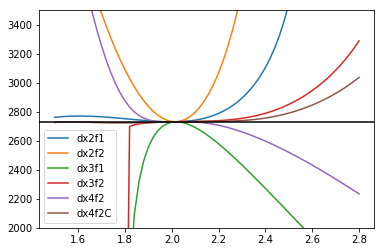

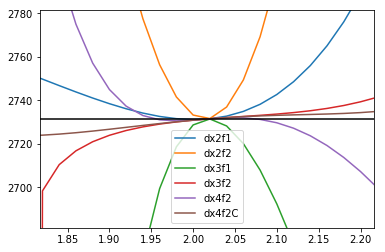

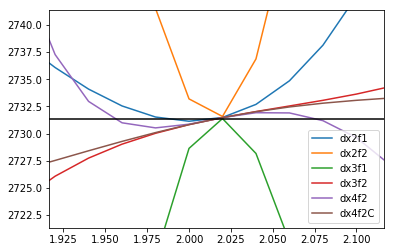

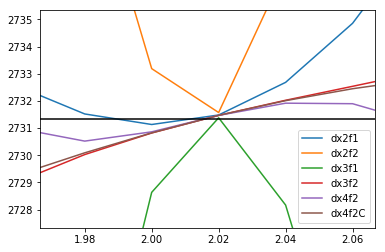

In [9]:
plt.plot([x[0] for x in DerivativesH05] ,[dx2f1(*x)[1] for x in DerivativesH05],label='dx2f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx2f2(*x)[1] for x in DerivativesH05],label='dx2f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f1(*x)[1] for x in DerivativesH05],label='dx3f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f2(*x)[1] for x in DerivativesH05],label='dx3f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2(*x)[1] for x in DerivativesH05],label='dx4f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2C(*x)[1] for x in DerivativesH05],label='dx4f2C')
plt.axhline(2731.332,color='black')
plt.ylim(2000,3500)
plt.legend()
plt.savefig('2nd_05fd.jpg')
plt.show()

plt.plot([x[0] for x in DerivativesH05] ,[dx2f1(*x)[1] for x in DerivativesH05],label='dx2f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx2f2(*x)[1] for x in DerivativesH05],label='dx2f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f1(*x)[1] for x in DerivativesH05],label='dx3f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f2(*x)[1] for x in DerivativesH05],label='dx3f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2(*x)[1] for x in DerivativesH05],label='dx4f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2C(*x)[1] for x in DerivativesH05],label='dx4f2C')
plt.axhline(2731.332,color='black')
plt.xlim(2.01655-.2,2.01655+.2) #+-.2 bohr
plt.ylim(2731.332-50,2731.332+50)
plt.legend()
plt.show()

plt.plot([x[0] for x in DerivativesH05] ,[dx2f1(*x)[1] for x in DerivativesH05],label='dx2f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx2f2(*x)[1] for x in DerivativesH05],label='dx2f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f1(*x)[1] for x in DerivativesH05],label='dx3f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f2(*x)[1] for x in DerivativesH05],label='dx3f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2(*x)[1] for x in DerivativesH05],label='dx4f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2C(*x)[1] for x in DerivativesH05],label='dx4f2C')
plt.axhline(2731.332,color='black')
plt.xlim(2.01655-.1,2.016553+.1) #+-.1 bohr
plt.ylim(2731.332-10,2731.332+10)
plt.legend()
plt.show()

plt.plot([x[0] for x in DerivativesH05] ,[dx2f1(*x)[1] for x in DerivativesH05],label='dx2f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx2f2(*x)[1] for x in DerivativesH05],label='dx2f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f1(*x)[1] for x in DerivativesH05],label='dx3f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f2(*x)[1] for x in DerivativesH05],label='dx3f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2(*x)[1] for x in DerivativesH05],label='dx4f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2C(*x)[1] for x in DerivativesH05],label='dx4f2C')
plt.axhline(2731.332,color='black')
plt.xlim(2.01655-.05,2.01655+.05) #+-.05 bohr
plt.ylim(2731.332-4,2731.332+4)
plt.savefig('2nd_05fd_zoom.jpg')
plt.legend()

/home/giorgiod/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


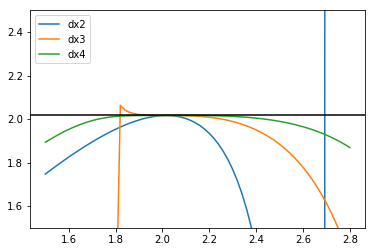

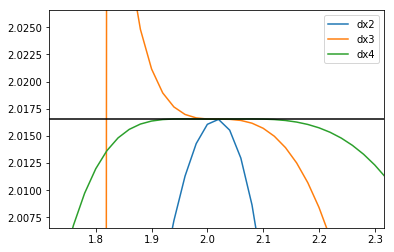

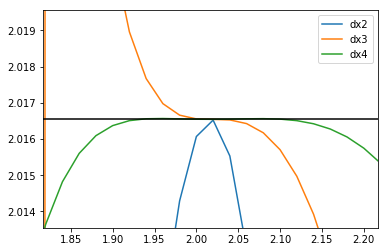

In [11]:
plt.plot([x[0] for x in DerivativesH05] ,[dx2f1(*x)[0] for x in DerivativesH05],label='dx2')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f1(*x)[0] for x in DerivativesH05],label='dx3')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2(*x)[0] for x in DerivativesH05],label='dx4')
plt.axhline(2.01655,color='black')
plt.ylim(1.5,2.5)
plt.legend()
plt.savefig('dist_05fd.jpg')
plt.show()

plt.plot([x[0] for x in DerivativesH05] ,[dx2f1(*x)[0] for x in DerivativesH05],label='dx2')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f1(*x)[0] for x in DerivativesH05],label='dx3')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2(*x)[0] for x in DerivativesH05],label='dx4')
plt.axhline(2.01655,color='black')
plt.ylim(2.01655-.01,2.01655+.01)
plt.xlim(2.01655-.3,2.016553+.3)
plt.legend()
plt.show()

plt.plot([x[0] for x in DerivativesH05] ,[dx2f1(*x)[0] for x in DerivativesH05],label='dx2')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f1(*x)[0] for x in DerivativesH05],label='dx3')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2(*x)[0] for x in DerivativesH05],label='dx4')
plt.axhline(2.01655,color='black')
plt.ylim(2.01655-.003,2.01655+.003)
plt.xlim(2.01655-.2,2.01655+.2)
plt.legend()
plt.savefig('dist_05fd_zoom.jpg')
plt.show()

/home/giorgiod/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


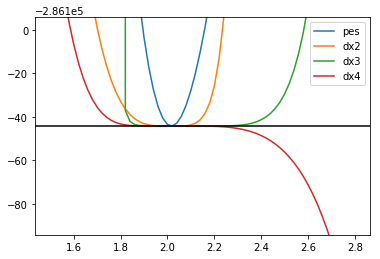

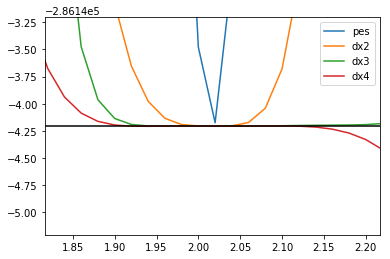

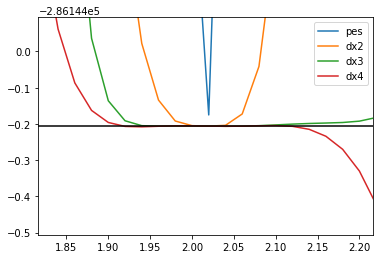

In [14]:
kjm=2625.50

plt.plot([x[0] for x in DerivativesH05],[x[1]*kjm  for x in DerivativesH05],label='pes')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx2f1(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx2')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx3f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx3')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx4f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx4')
plt.axhline(-108.98655719773731*kjm,color='black')
plt.ylim(-108.98655719773731*kjm-50,-108.98655719773731*kjm+50)
plt.legend()
plt.savefig('en_05fd.jpg')
plt.show()

# chemical accuracy
kjm=2625.50
plt.plot([x[0] for x in DerivativesH05],[x[1]*kjm  for x in DerivativesH05],label='pes')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx2f1(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx2')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx3f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx3')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx4f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx4')
plt.axhline(-108.98655719773731*kjm,color='black')
plt.ylim(-108.98655719773731*kjm-1,-108.98655719773731*kjm+1)
plt.xlim(2.01655-.2,2.01655+.2) 
plt.legend()
plt.show()

# .3 Kj/mol accuracy
kjm=2625.50
plt.plot([x[0] for x in DerivativesH05],[x[1]*kjm  for x in DerivativesH05],label='pes')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx2f1(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx2')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx3f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx3')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx4f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx4')
plt.axhline(-108.98655719773731*kjm,color='black')
plt.ylim(-108.98655719773731*kjm-.3,-108.98655719773731*kjm+.3)
plt.xlim(2.01655-.2,2.01655+.2)
plt.legend()
plt.savefig('en_05fd_zoom.jpg')
plt.show()

In [23]:
%store DerivativesH05

Stored 'DerivativesH05' (list)


In [3]:
%store -r